In [1]:
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
from mlgrad.af import averaging_function
from mlgrad.func import Sqrt

In [3]:
from sklearn.datasets import make_hastie_10_2

In [4]:
import numpy as np

In [34]:
XX, YY = make_hastie_10_2()
NN = len(YY)
N = NN//2
Xt, Yt = XX[N:], YY[N:]
X, Y = XX[:N], YY[:N]
n = X.shape[1]
M = 100

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
import matplotlib.pyplot as plt

$$
\ell (y, r) = -yr + \ln(1+e^r)
$$
$$
\ell^\prime_r (y, r) = -y + \frac {1} {1+e^{-r}}
$$

In [37]:
from scipy.special import expit, logsumexp
def loss(gb, X, Y):
    raw_predictions = gb._raw_predict(X).ravel()
    R = (1-Y)*raw_predictions
    # R = -1*(Y * raw_predictions).sum(axis=1) + logsumexp(raw_predictions, axis=1)
    return R

In [38]:
gb = GradientBoostingClassifier(n_estimators=M)
gb.fit(X, Y)
score = accuracy_score(Y, gb.predict(X))
score_t = accuracy_score(Yt, gb.predict(Xt))
print(score, score_t)

0.9561666666666667 0.8991666666666667


In [47]:
YY1 = YY.copy()

In [60]:
I1 = [i for i in range(NN) if YY[i] == 1]
NN1 = len(I1)
print(NN1)
# I1 = [i for i in I1 if sum(XX[i] > 0)]
# NN1 = len(I1)
print(NN1)
Is = np.random.randint(0, NN1, int(0.2*NN1))
for i in Is:
    j = I1[i]
    YY1[j] = -YY[j]

Y1 = YY1[:N]
Y1t = YY1[N:]

6009
6009


In [77]:
gb = GradientBoostingClassifier(n_estimators=M)
gb.fit(X, Y1)
score = accuracy_score(Y, gb.predict(X))
score_t = accuracy_score(Yt, gb.predict(Xt))
print(score, score_t)
avg = averaging_function('WM', alpha=0.6, rhofunc=Sqrt(0.001))

0.5321666666666667 0.5108333333333334


In [78]:
loss(gb, X, Y1)

array([0.        , 5.42994457, 5.12775265, ..., 7.56289309, 6.89851316,
       8.6436282 ])

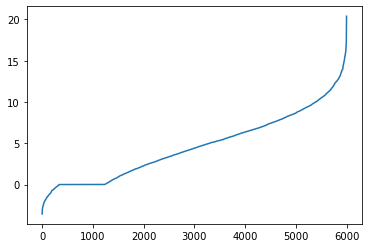

In [79]:
plt.plot(sorted(loss(gb, X, Y1)))

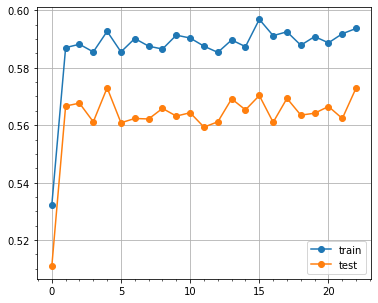

In [80]:
scores = [score]
scores_t = [score_t]
for k in range(22):
    U = loss(gb, X, Y1)
    avg.fit(U)
    G = avg.nabla(U)

    gb.fit(X, Y1, G)
    score = accuracy_score(Y, gb.predict(X))
    score_t = accuracy_score(Yt, gb.predict(Xt))
    scores.append(score)
    scores_t.append(score_t)
    
plt.figure(figsize=(6,5))
plt.plot(scores, marker='o', label='train')
plt.plot(scores_t, marker='o', label='test')
plt.grid(1)
plt.minorticks_on()
plt.legend()
plt.show()